# Image Interpolation

Image interpolation is a fundamental operation in digital image processing used to estimate unknown pixel values when an image is resized, rotated, or geometrically transformed. When an image is scaled, the new pixel locations generally do not coincide with the original pixel grid. Interpolation techniques compute intensity values at these new locations based on neighboring known pixels, ensuring a visually continuous image.

During image resizing, simply duplicating or removing pixels results in distortion, loss of detail, and visible artifacts. Image interpolation provides a systematic way to preserve spatial continuity, edges, and visual smoothness, making it essential for applications such as image zooming, medical imaging, satellite imaging, and computer vision.

### Nearest Neighbor Interpolation
Nearest neighbor interpolation assigns the intensity value of the closest pixel from the original image to the new pixel location. It is computationally simple and fast but often produces blocky artifacts and jagged edges, especially during image enlargement. This method is mainly used where speed is more critical than image quality.

### Bilinear Interpolation
Bilinear interpolation computes the new pixel value as a weighted average of the four nearest neighboring pixels. It provides smoother results than nearest neighbor interpolation by reducing blockiness. However, it may cause slight blurring, particularly around edges.

### Bicubic Interpolation
Bicubic interpolation uses the sixteen nearest neighboring pixels to estimate the new pixel value through cubic convolution. It produces smoother and more visually pleasing results with better edge preservation compared to bilinear interpolation. Due to its higher computational complexity, bicubic interpolation is commonly used in high-quality image processing and image editing applications.

### Comparison of Interpolation Techniques
The choice of interpolation method involves a trade-off between computational complexity and image quality. Nearest neighbor interpolation is fast but produces poor visual quality, bilinear interpolation offers a balance between speed and smoothness, and bicubic interpolation provides superior image quality at the cost of increased computation.


In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Original image size: 975 x 845 x 3 


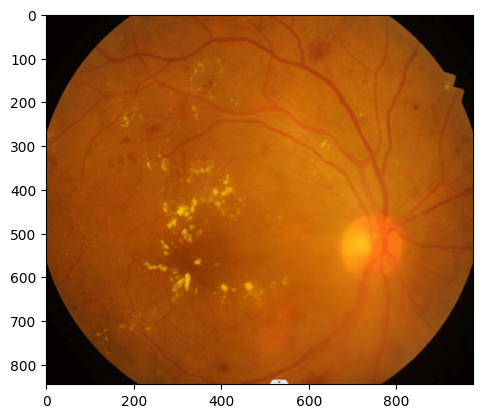

In [2]:
# Step 1: Load image using OpenCV
img = cv2.imread('IPimg3.jpg')  
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(img)
orig_h, orig_w, channels = img.shape  
print(f"Original image size: {orig_w} x {orig_h} x {channels} ")

In [3]:
# Step 2: Define new size
new_w = 300  # new width
new_h = 300  # new height

In [4]:
# Step 3: Compute row and column scales
row_scale = (orig_h - 1) / (new_h - 1)
col_scale = (orig_w - 1) / (new_w - 1)

In [5]:
#Step 4: Initialize new image array
resized = np.zeros((new_h, new_w, channels), dtype=np.uint8)

In [6]:
# Step 5: Bilinear interpolation
for i in range(new_h):
    for j in range(new_w):
        # Map new pixel to original coordinates
        y = i * row_scale
        x = j * col_scale
        
        y1 = int(np.floor(y))
        y2 = min(y1 + 1, orig_h - 1)
        x1 = int(np.floor(x))
        x2 = min(x1 + 1, orig_w - 1)
        
        dy = y - y1
        dx = x - x1
        
        for c in range(channels):
            Q11 = img[y1, x1, c]
            Q21 = img[y1, x2, c]
            Q12 = img[y2, x1, c]
            Q22 = img[y2, x2, c]
            
            # Bilinear interpolation formula
            value = (Q11 * (1 - dx) * (1 - dy) +
                     Q21 * dx * (1 - dy) +
                     Q12 * (1 - dx) * dy +
                     Q22 * dx * dy)
            
            resized[i, j, c] = int(round(value))


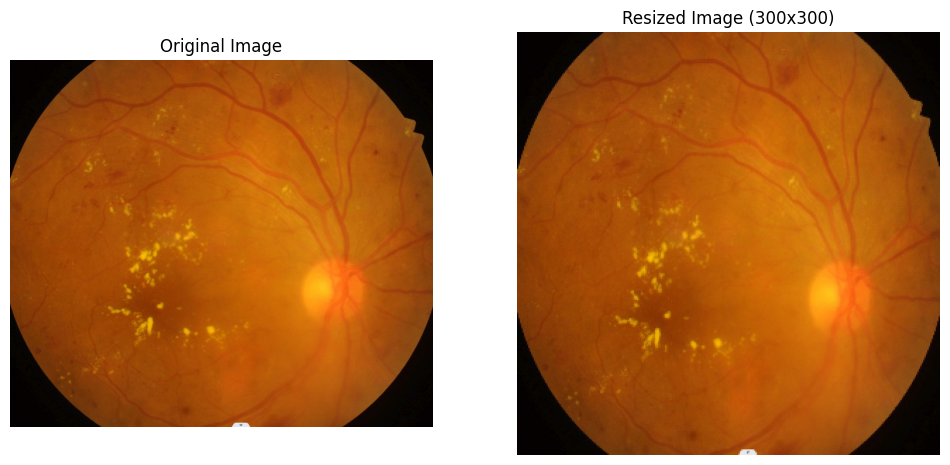

In [8]:
# Step 6: Display images
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Resized Image ({new_w}x{new_h})")
plt.imshow(resized)
plt.axis('off')
plt.show()

### For grayscale image

In [9]:
# Step 1: Load grayscale image using OpenCV
img = cv2.imread('IPimg1.jpeg', cv2.IMREAD_GRAYSCALE)  # Grayscale
orig_h, orig_w = img.shape
print(f"Original image size: {orig_w} x {orig_h}")

Original image size: 225 x 225


In [10]:
# Step 2: Define new size
new_w = 300  # new width
new_h = 300  # new height

In [11]:
# Step 3: Compute row and column scales
row_scale = (orig_h - 1) / (new_h - 1)
col_scale = (orig_w - 1) / (new_w - 1)

In [12]:
# Step 4: Initialize new image array
resized = np.zeros((new_h, new_w), dtype=np.uint8)

In [13]:
# Step 5: Bilinear interpolation
for i in range(new_h):
    for j in range(new_w):
        # Map new pixel to original coordinates
        y = i * row_scale
        x = j * col_scale
        
        y1 = int(np.floor(y))
        y2 = min(y1 + 1, orig_h - 1)
        x1 = int(np.floor(x))
        x2 = min(x1 + 1, orig_w - 1)
        
        # Fractional distances     
        dx = (x - x1) / (x2 - x1) if x2 != x1 else 0
        dy = (y - y1) / (y2 - y1) if y2 != y1 else 0
        
        Q11 = img[y1, x1]
        Q21 = img[y1, x2]
        Q12 = img[y2, x1]
        Q22 = img[y2, x2]
        
        # Bilinear interpolation
        value = Q11*(1-dx)*(1-dy) + Q21*dx*(1-dy) + Q12*(1-dx)*dy + Q22*dx*dy
        resized[i, j] = int(round(value))



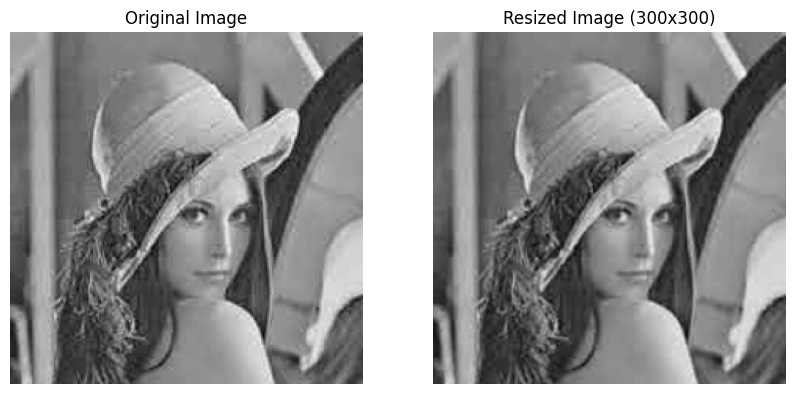

In [14]:
# Step 6: Display images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title(f"Resized Image ({new_w}x{new_h})")
plt.imshow(resized, cmap='gray')
plt.axis('off')
plt.show()

### Nearest Neighbour

In [15]:
# Step 1: Load the image (using OpenCV)
img = cv2.imread("IPimg3.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # Convert BGR → RGB for correct display

orig_h, orig_w, channels = img.shape
print("Original size:", orig_h, "x", orig_w)


Original size: 845 x 975


In [16]:
# Step 2: Define new size
new_h = 300
new_w = 300


In [17]:
# Step 3: Create an empty output image
resized = np.zeros((new_h, new_w, channels), dtype=np.uint8)

In [18]:
# Step 4: Calculate scale factors
row_scale = orig_h / new_h
col_scale = orig_w / new_w

In [19]:
# Step 5: Perform nearest neighbour interpolation
for i in range(new_h):
    for j in range(new_w):
        # Map coordinates in resized image to original image
        x = int(np.floor(i * row_scale))
        y = int(np.floor(j * col_scale))
        
        # Ensure indices stay within bounds
        x = min(x, orig_h - 1)
        y = min(y, orig_w - 1)
        
        # Assign nearest pixel
        resized[i, j] = img[x, y]


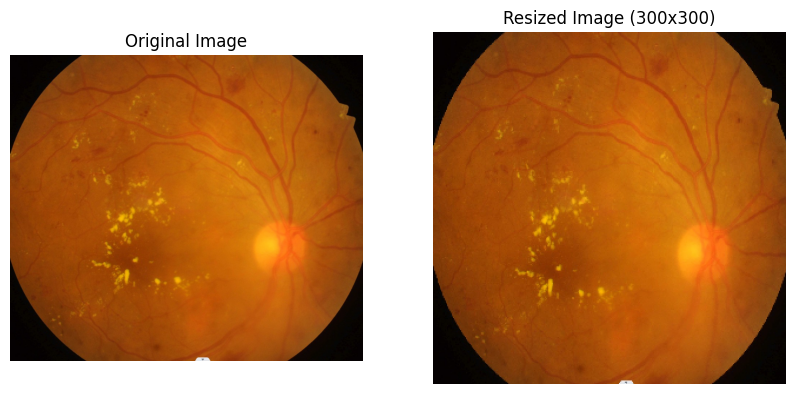

In [20]:
# Step 6: Display the result
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(resized)
plt.title(f"Resized Image ({new_w}x{new_h})")
#plt.title('Nearest Neighbour Resized Image')
plt.axis('off')
plt.show()


### Bicubic Interpolation

In [21]:
def cubic_weight(t, a=-0.5):
    """Cubic convolution kernel (vectorized)."""
    abs_t = np.abs(t)
    abs_t2 = abs_t ** 2
    abs_t3 = abs_t ** 3
    
    w = np.zeros_like(t)
    mask1 = abs_t <= 1
    mask2 = (abs_t > 1) & (abs_t < 2)
    
    w[mask1] = (a + 2)*abs_t3[mask1] - (a + 3)*abs_t2[mask1] + 1
    w[mask2] = a*abs_t3[mask2] - 5*a*abs_t2[mask2] + 8*a*abs_t[mask2] - 4*a
    return w

In [22]:
def bicubic_interpolation_fast(img, scale):
    """
    Fast bicubic interpolation using vectorized NumPy operations.
    """
    h, w, c = img.shape
    new_h, new_w = int(h * scale), int(w * scale)
    
    # Coordinate grids
    x = np.arange(new_h) / scale
    y = np.arange(new_w) / scale
    x0 = np.floor(x).astype(int)
    y0 = np.floor(y).astype(int)
    
    dx = x - x0
    dy = y - y0

    # Clip to boundaries
    x0 = np.clip(x0, 1, h - 3)
    y0 = np.clip(y0, 1, w - 3)

    # Precompute weights for performance
    wx = np.array([cubic_weight(dx + 1), cubic_weight(dx), cubic_weight(dx - 1), cubic_weight(dx - 2)])
    wy = np.array([cubic_weight(dy + 1), cubic_weight(dy), cubic_weight(dy - 1), cubic_weight(dy - 2)])
    
    out = np.zeros((new_h, new_w, c), dtype=np.float32)

    for ch in range(c):
        # For each output pixel, calculate 4x4 weighted sum
        for m in range(-1, 3):
            for n in range(-1, 3):
                src_x = np.clip(x0 + m, 0, h - 1)
                src_y = np.clip(y0 + n, 0, w - 1)
                w_x = wx[m + 1][:, None]  # column vector
                w_y = wy[n + 1][None, :]  # row vector
                out[:, :, ch] += w_x * w_y * img[src_x[:, None], src_y[None, :], ch]

    return np.clip(out, 0, 255).astype(np.uint8)


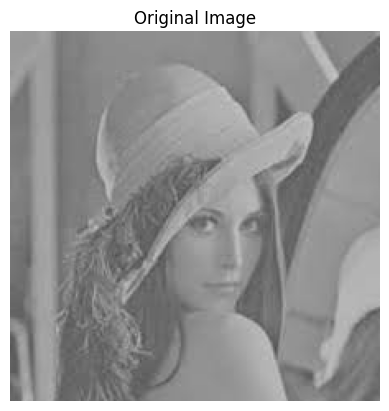

In [23]:
img = cv2.imread('IPimg1.jpeg',cv2.IMREAD_GRAYSCALE)        # replace with your image filename
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [24]:
scale = 2.0  # Example: 2x enlargement
bicubic_img = bicubic_interpolation_fast(img, scale)

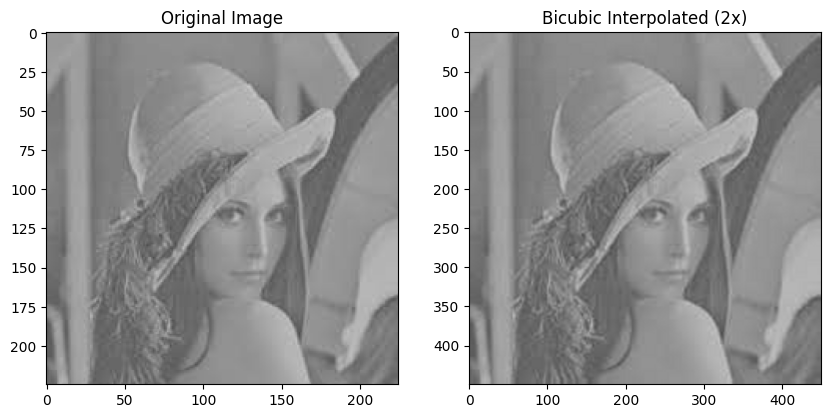

In [25]:
# Display
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Bicubic Interpolated (2x)")
plt.imshow(bicubic_img)
plt.show()